# Pre-Fit and Post-Fit plots
This notebook plots the pre/post-fit plots using the outputs from running runcards.py and runcombine.py. Firstly, make a `fitDiagnostics.root` file containin the pre/post-fit distributions by activating cmsenv and running 

`combine -M FitDiagnostics combined.root -m 200 --rMin -1 --rMax 2 --saveShapes --saveWithUncertainties`

Note that any other datacard is also fine and should give the same prefit and background only postfit distributions, but make sure to adjust the r-interval (--rMin, --rMax) accordingly.


In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist.intervals
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import mplhep as hep
import os

In [3]:
filename = "../allYears_720_v6/cards-GluGluToSUEP_HT1000_T3p00_mS300.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8/fitDiagnostics.root"  # replace with your actual ROOT file path
file = uproot.open(filename)

bins = np.array([90,110,130,170,250])
centers = np.array( [(bins[i] + bins[i + 1])/2 for i in range(len(bins) - 1)])

out_label = "/home/submit/{}/public_html/SUEP/limits/debug/{}"
AN_label = '/home/submit/lavezzo/SUEP/AN-22-133/images/offline/{}.pdf'
saveToAN = False # control whether to save to AN directory

In [4]:
def compute_poisson_interval(values, confidence=0.6827):
    alpha = 1 - confidence
    low = chi2.ppf(alpha / 2., 2 * values) / 2
    high = chi2.ppf(1. - alpha / 2., 2 * (values + 1)) / 2
    low[np.isnan(low)] = 0
    return low, high

lumis = {
    "2016_apv": 19497.914,
    "2016": 16810.813,
    "2017": 41471.589,
    "2018": 59817.406,
    "all": 19497.914 + 16810.813 + 41471.589 + 59817.406,
}


def lumiLabel(year):
    if year in ["2017", "2018"]:
        return round(lumis[year] / 1000, 1)
    elif year == "2016":
        return round((lumis[year] + lumis[year + "_apv"]) / 1000, 1)
    elif year == 'all':
        return round(lumis[year] / 1000, 1)

fit_b 2016 Bin1Sig 4548.7944 3632.925
fit_b 2016 Bin2Sig 194.69136 142.53976
fit_b 2016 Bin3Sig 11.819251 8.193058
fit_b 2016 Bin4Sig 1.070531e-09 1.0306634e-09
fit_s 2016 Bin1Sig 4633.489 4234.4727
fit_s 2016 Bin2Sig 224.98524 158.4588
fit_s 2016 Bin3Sig 14.434545 10.121963
fit_s 2016 Bin4Sig 4.44761e-11 3.5224445e-11
prefit 2016 Bin1Sig 4267.4116 477712.16
prefit 2016 Bin2Sig 198.5869 8696.275
prefit 2016 Bin3Sig 17.652168 326.07574
prefit 2016 Bin4Sig 0.00022065212 6.243284e-08


/tmp/ipykernel_2238954/3452132126.py:60: RuntimeWarning: divide by zero encountered in power
  ratio_prefit_err = np.sqrt( ((expected[year]['prefit']**2)*(data[year])**-4)*(data[year]) + (data[year]**-2)*(expected_err[year]['prefit']**2))
/tmp/ipykernel_2238954/3452132126.py:60: RuntimeWarning: invalid value encountered in multiply
  ratio_prefit_err = np.sqrt( ((expected[year]['prefit']**2)*(data[year])**-4)*(data[year]) + (data[year]**-2)*(expected_err[year]['prefit']**2))
/tmp/ipykernel_2238954/3452132126.py:63: RuntimeWarning: divide by zero encountered in power
  ratio_postfit_err = np.sqrt( ((expected[year]['fit_b']**2)*(data[year]**-4))*(data[year]) + (data[year]**-2)*(expected_err[year]['fit_b']**2))
/tmp/ipykernel_2238954/3452132126.py:63: RuntimeWarning: invalid value encountered in multiply
  ratio_postfit_err = np.sqrt( ((expected[year]['fit_b']**2)*(data[year]**-4))*(data[year]) + (data[year]**-2)*(expected_err[year]['fit_b']**2))
/tmp/ipykernel_2238954/3452132126.py:66: R

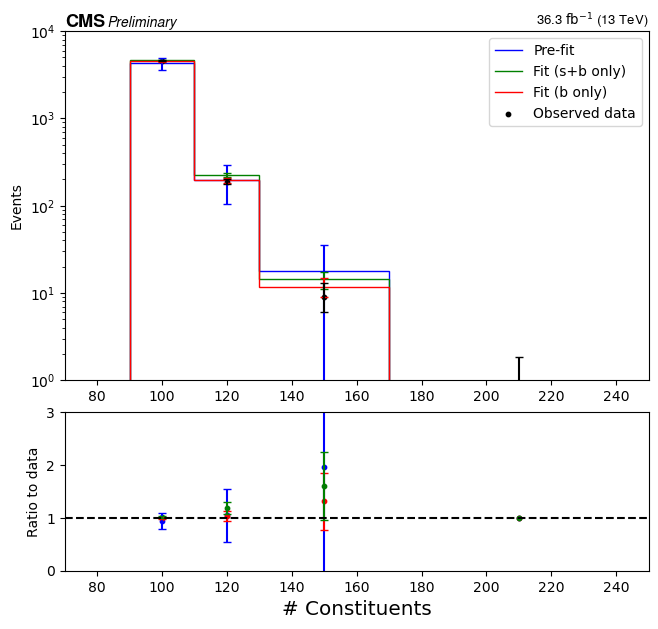

fit_b 2017 Bin1Sig 6048.1543 5066.932
fit_b 2017 Bin2Sig 294.07648 195.6864
fit_b 2017 Bin3Sig 11.550174 9.0706625
fit_b 2017 Bin4Sig 4.4932627e-10 3.7991663e-10
fit_s 2017 Bin1Sig 6146.594 5797.7314
fit_s 2017 Bin2Sig 331.93872 253.363
fit_s 2017 Bin3Sig 15.472985 9.682079
fit_s 2017 Bin4Sig 6.116945e-13 9.415587e-13
prefit 2017 Bin1Sig 5704.391 1650806.2
prefit 2017 Bin2Sig 280.4317 20423.98
prefit 2017 Bin3Sig 6.8397975 159.71301
prefit 2017 Bin4Sig 0.00022799325 9.4940944e-08


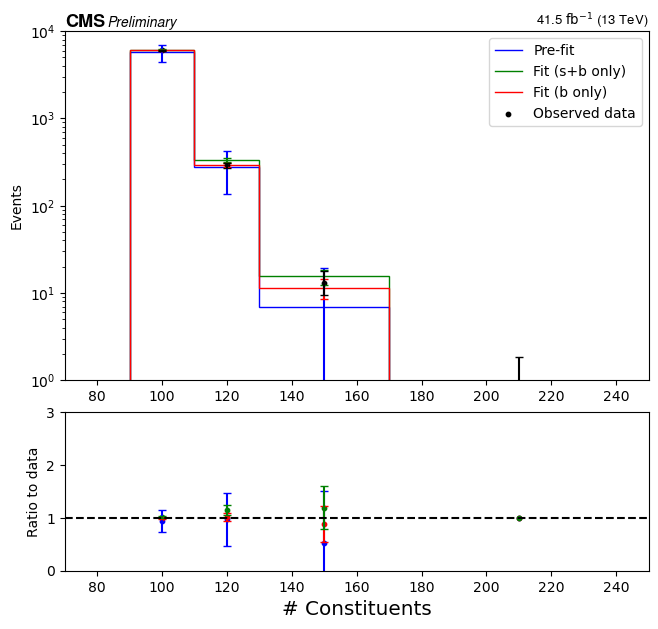

fit_b 2018 Bin1Sig 8226.441 8047.744
fit_b 2018 Bin2Sig 391.9621 332.59705
fit_b 2018 Bin3Sig 19.454924 16.752522
fit_b 2018 Bin4Sig 1.17184945e-05 8.389001e-06
fit_s 2018 Bin1Sig 8366.547 6332.027
fit_s 2018 Bin2Sig 448.87964 420.88293
fit_s 2018 Bin3Sig 26.017277 21.203484
fit_s 2018 Bin4Sig 8.3628165e-12 7.96489e-12
prefit 2018 Bin1Sig 7075.267 1188154.6
prefit 2018 Bin2Sig 343.45956 20265.63
prefit 2018 Bin3Sig 11.079341 573.03876
prefit 2018 Bin4Sig 0.00022158682 3.7537383e-08


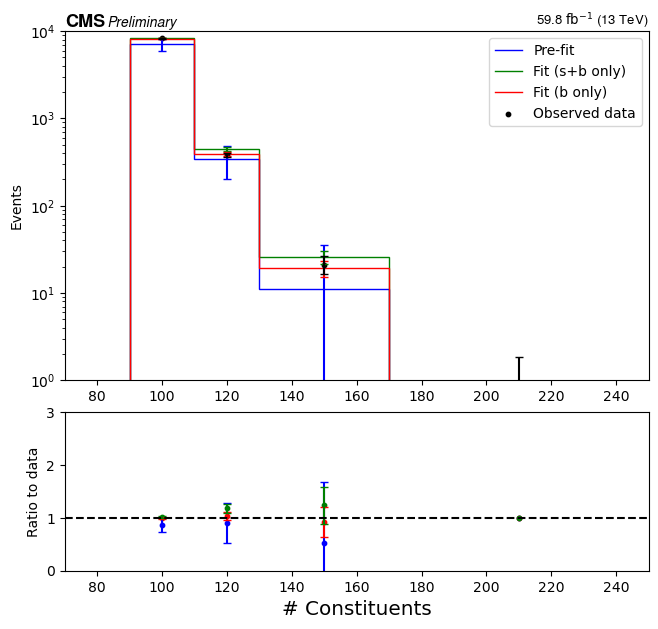

In [18]:
expected, expected_err = {}, {}
data, data_err = {}, {}
for year in ['2016','2017','2018']:
    
    ### Collect data
    expected[year], expected_err[year] = {}, {}
    for fit in ['fit_b', 'fit_s', 'prefit']:
                
        expected[year][fit] = np.array([]) 
        expected_err[year][fit] = np.array([])

        for sig_bins in ['Bin1Sig','Bin2Sig','Bin3Sig','Bin4Sig']: #['Bin0crF','Bin1crF','Bin2crF','Bin3crF','Bin4crF']

            name = 'shapes_{}/{}{};1'.format(fit,sig_bins,year)
            if name not in file.keys(): continue
            
            err = np.sqrt(file[name]['total_covar;1'].to_numpy()[0][0][0])
            print(fit, year, sig_bins, file[name]['expected;1'].values()[0], file[name]['total_covar;1'].to_numpy()[0][0][0])
            expected[year][fit] = np.append(expected[year][fit],file[name]['expected;1'].values()[0])
            expected_err[year][fit] = np.append(expected_err[year][fit],err)
              
    data[year], data_err[year] = np.array([]), np.array([])
    for sig_bins in ['Bin1Sig','Bin2Sig','Bin3Sig','Bin4Sig']:
        name = 'shapes_{}/{}{};1'.format(fit,sig_bins,year)
        data[year] = np.append(data[year],file[name]['data;1'].values()[1])
    low, high = compute_poisson_interval(data[year]) 
    data_err[year] = (data[year] - low, high - data[year])
    
    ### Plot everything
    fig = plt.figure(figsize=(8,10))
    fig.subplots_adjust(bottom=0.15, left=0.17)
    
    # Plot histograms
    ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)
    ax1.stairs(expected[year]['prefit'], edges=bins, label='Pre-fit', color='b')
    ax1.errorbar(centers, expected[year]['prefit'], expected_err[year]['prefit'], capsize=3, linestyle='', color='b')
    if 'fit_s' in expected[year].keys(): 
        ax1.stairs(expected[year]['fit_s'], edges=bins, label='Fit (s+b only)', color='green')
        ax1.errorbar(centers, expected[year]['fit_s'], expected_err[year]['fit_s'], capsize=3, linestyle='', color='green')
    if 'fit_b' in expected[year].keys(): 
        ax1.stairs(expected[year]['fit_b'], edges=bins, label='Fit (b only)', color='r')
        ax1.errorbar(centers, expected[year]['fit_b'], expected_err[year]['fit_b'], capsize=3, linestyle='', color='r')
    ax1.scatter(centers, data[year],  c='black', s=10, label='Observed data')
    ax1.errorbar(centers, data[year], yerr=data_err[year], c='black',linestyle='',capsize=3)

    ax1.set_ylabel("Events")
    ax1.set_yscale('log')
    ax1.set_ylim(1e0, 1e4)
    ax1.legend()
    
    ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
   
    ratio_prefit = np.divide(expected[year]['prefit'], data[year], out=np.ones_like(data[year]), where=data[year]!=0)
    ratio_prefit_err = np.sqrt( ((expected[year]['prefit']**2)*(data[year])**-4)*(data[year]) + (data[year]**-2)*(expected_err[year]['prefit']**2))
    if 'fit_b' in expected[year].keys():
        ratio_postfit = np.divide(expected[year]['fit_b'], data[year], out=np.ones_like(data[year]), where=data[year]!=0) 
        ratio_postfit_err = np.sqrt( ((expected[year]['fit_b']**2)*(data[year]**-4))*(data[year]) + (data[year]**-2)*(expected_err[year]['fit_b']**2))
    if 'fit_s' in expected[year].keys():
        ratio_sfit = np.divide(expected[year]['fit_s'], data[year], out=np.ones_like(data[year]), where=data[year]!=0) 
        ratio_sfit_err = np.sqrt( ((expected[year]['fit_s']**2)*(data[year]**-4))*(data[year]) + (data[year]**-2)*(expected_err[year]['fit_s']**2))
      
    ax2.errorbar(centers, ratio_prefit, color='blue', yerr=ratio_prefit_err, linestyle='',capsize=3)
    ax2.scatter(centers, ratio_prefit,  c='blue', s=10)
    if 'fit_b' in expected[year].keys():  
        ax2.errorbar(centers, ratio_postfit, color='red', yerr=ratio_postfit_err, linestyle='',capsize=3)
        ax2.scatter(centers, ratio_postfit,  c='red', s=10)
    if 'fit_s' in expected[year].keys():  
        ax2.errorbar(centers, ratio_sfit, color='green', yerr=ratio_sfit_err, linestyle='',capsize=3)
        ax2.scatter(centers, ratio_sfit,  c='green', s=10)

    ax2.axhline(1,ls='--',color='black')
    ax2.set_xlim([70,250])
    ax2.set_ylim([0,3])
    ax2.set_xlabel(r"# Constituents", fontsize='x-large')
    ax2.set_ylabel("Ratio to data")
    
    hep.cms.label(llabel='Preliminary',data=True, lumi=lumiLabel(year), ax=ax1)

    plt.savefig(out_label.format(os.environ['USER'], 'postfit_'+year))
    if saveToAN: plt.savefig(AN_label.format("postfit_"+year), bbox_inches='tight')

    plt.show()

## Yields Table for AN

In [42]:
import math

def sf(value, error):
    # Calculate the number of significant figures based on the error
    significant_figures = round(-math.log10(error)) + 1
    
    if significant_figures < 0: significant_figures = 0

    # Round the value and error to the determined significant figures
    rounded_value = round(value, significant_figures)
    rounded_error = round(error, significant_figures)

    return rounded_value, rounded_error

In [46]:
labels = [
    r'$\# Const. \in ( 90, 110]$',
    r'$\# Const. \in ( 110, 130]$',
    r'$\# Const. \in ( 130, 170]$',
    r'$\# Const. \in ( 170, \inf]$',      
]

header = ' & '
for y in expected.keys(): header+= ' & ' + str(y)
print(header + r'\\')
for iBin in range(len(labels)):
    line1, line2 = '', ''
    line1 += 'Bin {}'.format(iBin+1) # we are Bin 0, since it's validation region
    line1 += ' & Exp.'
    line2 += labels[iBin] 
    line2 += ' & Obs.'
    
    for year in expected.keys():
        line1 += ' & '
        v, e = expected[year]['fit_b'][iBin], expected_err[year]['fit_b'][iBin]
        v, e = sf(v, e)
        line1 += '${} \pm {}$'.format(v, e)
        
    for year in data.keys():
        line2 += ' & '
        #v, e_up, e_down = data[year][iBin], np.sqrt(data_err[year][1][iBin]), np.sqrt(data_err[year][0][iBin])
        v, e_up, e_down = data[year][iBin], data_err[year][1][iBin], data_err[year][0][iBin]
        if v == 0: 
            e_down, e_up = compute_poisson_interval(v)
            e_down = 0
        emax = max(e_up, e_down)
        v, _ = sf(v, emax)
        e_up, _ = sf(e_up, emax)
        e_down, _ = sf(e_down, emax)
        if e_up == e_down:
            line2 += '${} \pm {}$'.format(v, e_up)
        else:
            line2 += '$' + str(v) + '^{+' + str(e_up) + '}_{-' + str(e_down) + '}$'
    
    line1 += r'\\'
    line2 += r'\\'
    
    print('\hline')
    print(line1)
    print(line2)

 &  & 2016 & 2017 & 2018\\
\hline
Bin 1 & Exp. & $4549.0 \pm 64.0$ & $6048.0 \pm 72.0$ & $8226.0 \pm 87.0$\\
$\# Const. \in ( 90, 110]$ & Obs. & $4568.0^{+69.0}_{-68.0}$ & $6055.0^{+79.0}_{-78.0}$ & $8249.0^{+92.0}_{-91.0}$\\
\hline
Bin 2 & Exp. & $195.0 \pm 13.0$ & $294.0 \pm 15.0$ & $392.0 \pm 19.0$\\
$\# Const. \in ( 110, 130]$ & Obs. & $189.0^{+15.0}_{-14.0}$ & $289.0^{+18.0}_{-17.0}$ & $380.0^{+21.0}_{-19.0}$\\
\hline
Bin 3 & Exp. & $11.8 \pm 2.7$ & $11.5 \pm 3.1$ & $19.0 \pm 4.0$\\
$\# Const. \in ( 130, 170]$ & Obs. & $9.0^{+4.0}_{-3.0}$ & $13.0^{+5.0}_{-4.0}$ & $21.0^{+6.0}_{-5.0}$\\
\hline
Bin 4 & Exp. & $0.0 \pm 3e-05$ & $0.0 \pm 1.9e-05$ & $0.0 \pm 0.003$\\
$\# Const. \in ( 170, \inf]$ & Obs. & $0.0^{+1.8}_{-0}$ & $0.0^{+1.8}_{-0}$ & $0.0^{+1.8}_{-0}$\\


## Figure for Paper

In [5]:
expected, expected_err = {}, {}
for year in ['2016','2017','2018']:
    
    expected[year], expected_err[year] = {}, {}
    
    for fit in ['fit_b', 'prefit']:
                
        expected[year][fit], expected_err[year][fit] = {}, {}

        for region in ['Bin1Sig','Bin2Sig','Bin3Sig','Bin4Sig',
                         'Bin0crF','Bin1crF','Bin2crF','Bin3crF','Bin4crF',
                         'catcrA', 'catcrB', 'catcrC', 'catcrD', 'catcrE',
                         'catcrG', 'catcrH']:

            name = 'shapes_{}/{}{};1'.format(fit,region,year)
            
            expected[year][fit][region] = file[name]['expected;1'].values()[0]
            expected_err[year][fit][region] = np.sqrt(file[name]['total_covar;1'].to_numpy()[0][0][0]) 

In [9]:
years = ['2018', '2017', '2016']

postfits, postfit_errs = [], []
prefits, prefit_errs = [], []
for region in ['catcrA', 'catcrB', 'catcrC', 'catcrD', 'catcrE', 
               'Bin0crF','Bin1crF','Bin2crF','Bin3crF','Bin4crF',
               'catcrG', 'catcrH', 'Bin0Sig', 'Bin1Sig','Bin2Sig','Bin3Sig','Bin4Sig']:
    
    # validation region not used for fitting
    if region == 'Bin0Sig':
        postfits.append(np.nan)
        postfit_errs.append(np.nan)
        prefits.append(np.nan)
        prefit_errs.append(np.nan)
        continue
        
    postfit = np.sum([expected[yr]['fit_b'][region] for yr in years]) 
    postfit_err = np.sqrt(np.sum([expected_err[yr]['fit_b'][region]**2 for yr in years]))
    postfits.append(postfit)
    postfit_errs.append(postfit_err)
    
    prefit = np.sum([expected[yr]['prefit'][region] for yr in years]) 
    prefit_err = np.sqrt(np.sum([expected_err[yr]['prefit'][region]**2 for yr in years]))
    prefits.append(prefit)
    prefit_errs.append(prefit_err)
    
print("Postfits")
for x in postfits: print(x,',')
print("\nPostfit Errors")
for x in postfit_errs: print(x,',')
print("\nPrefits")
for x in prefits: print(x,',')
print("\nPrefit Errors")
for x in prefit_errs: print(x,',')

Postfits
4638038.0 ,
1343549.8 ,
127470.81 ,
3649479.0 ,
1295964.0 ,
136524.72 ,
7678.991 ,
345.368 ,
16.168629 ,
3.4765308e-06 ,
4971188.0 ,
2309313.0 ,
nan ,
18823.39 ,
880.7299 ,
42.82435 ,
1.1720014e-05 ,

Postfit Errors
2123.3659944305855 ,
1126.410215509432 ,
359.2458458447176 ,
1941.9553842222333 ,
1126.635963516508 ,
368.41880141918887 ,
86.38887122267921 ,
13.403508531351386 ,
2.2734110309361637 ,
0.000837367510536049 ,
2287.281867587071 ,
1463.239655601415 ,
nan ,
129.4125252545653 ,
25.90025519322387 ,
5.832344331215792 ,
0.0028966206157405474 ,

Prefits
4638063.0 ,
1343499.0 ,
127497.0 ,
3649429.0 ,
1296068.0 ,
136500.0 ,
7629.0 ,
368.0 ,
16.0 ,
0.00029999999 ,
4971213.0 ,
2309263.0 ,
nan ,
17047.07 ,
822.47815 ,
35.571304 ,
0.0006702322 ,

Prefit Errors
1.5404697171177615 ,
8.63358372101191 ,
12.631246024529238 ,
0.9414085229477391 ,
2.875702117595318 ,
4.1264866827564495 ,
5.61164141467429 ,
8.051477831981884 ,
4.981154660456555 ,
0.0 ,
1.3836658463103708 ,
9.329834964412

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 8), sharey=True,sharex=True) #Plot 3 subplots
fig.subplots_adjust(wspace=0) #Plot 
(ax1, ax2, ax3) = axes

xregions = [30,50,70,90,110,130,170,200]
    
slicing = [30,50,70,200] #The boundary of the ABCD regions 
label_positions = [32,55,90] #The positions of the letters
colormap = plt.cm.get_cmap('Pastel1')
colors = [colormap(0.3),colormap(0.5),colormap(0.8)]

ymax = 0

# Plot the distributions in every region
regions = {'A':(ax1,0),
           'B':(ax1,1),
           'C':(ax1,2),
           'D':(ax2,0),
           'E':(ax2,1),
           'F':(ax2,2),
           'G':(ax3,0),
           'H':(ax3,1),
           'SR':(ax3,2)}

for letter, (axis,i) in regions.items():
    
    if letter in ['SR', 'F']:
        for ibin in range(1,5):
            if letter == 'SR':
                region_name = 'Bin' + ibin + 'Sig'
            elif letter == 'F':
                region_name = 'Bin' + ibin + 'crF'
            obs = data['2018'][region_name]
            obs_err = data_err['2018'][region_name]
            postfit = expected['2018']['fit_b'][region_name]
            postfit_err = expected_err['2018']['fit_b'][region_name]
            
            x = xregions[-5]
            
    else:
        region_name = 'catcr' + letter
        obs = data['2018'][region_name]
        obs_err = data_err['2018'][region_name]
        postfit = expected['2018']['fit_b'][region_name]
        postfit_err = expected_err['2018']['fit_b'][region_name]
        
        x = xregions[round(i/3), round(i/3)+2]

    axis.stairs(postfit, x, fill=True,color=colors[i])
    
    centers = (x + np.roll(x,1))/2
    centers = centers[1:] #centers of bins
    axis.text(label_positions[i],1,str(letter))
    axis.errorbar(centers,y,yerr=yerr,linestyle='',c='black',capsize=1.5,fmt ='.')
    ymax = max(np.append(y,ymax))

# get these from the postfit in SUEPLimits
SR_exp_vals = np.array([
    SR_exp.values()[0],
    4550+6050+8830,
    195+294+392,
    7.4+11.3+19,
    0
])
SR_err = np.array([
    np.sqrt(SR_exp.variances()[0]),
    np.sqrt(40**2 + 70**2 + 90**2),
    np.sqrt(8**2 + 15**2 + 19**2),
    np.sqrt(2.4**2 + 2.9**2 + 4**2),
    0
])
ax3.errorbar(centers,SR_exp_vals,yerr=SR_err,linestyle='',c='blue',capsize=1.5,fmt ='.',label ='expected')


#Adjust the figure and add labels 
ytop = ymax *10 # The upper limit for the yaxis
for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(0.5,ytop)
    ax.vlines([30,50,70],0.5,ytop,color='black') #Take bin edges
    
ax1.set_ylabel('Events',labelpad=10)
ax3.set_xlabel('$n^{SUEP}_{constituent}$', labelpad=10, loc='right')

ax1.text(87,ymax,r'$Sph_{1} \in (0.3,0.4]$',fontsize=17)
ax2.text(87,ymax,r'$Sph_{1} \in (0.4,0.5]$',fontsize=17)
ax3.text(80,ymax,r'$Sph_{1} \in (0.5,1.0]$',fontsize=17)

# ax3.set_xlim([10,220])
plt.legend()

#Add CMS statements
cms = ax.text(
    -345, ytop*1.7, u"CMS $\it{Preliminary}$",
    fontsize=24, fontweight='bold',
)

lumi = ax.text(
    115, ytop*1.7, r"%.1f fb$^{-1}$ ($13$ TeV)" % round(lumiLabel('2016')+lumiLabel('2017')+lumiLabel('2018'),1),
    fontsize=22,
)
fig.tight_layout()
plt.autoscale()

plt.savefig('/home/submit/{}/SUEP/EXO-23-002/images/all_regions.pdf'.format(os.environ['USER']),format='pdf',bbox_inches='tight')

['shapes_prefit;1',
 'shapes_prefit/Bin0crF2016;1',
 'shapes_prefit/Bin0crF2016/data;1',
 'shapes_prefit/Bin0crF2016/expected;1',
 'shapes_prefit/Bin0crF2016/Signal;1',
 'shapes_prefit/Bin0crF2016/total;1',
 'shapes_prefit/Bin0crF2016/total_signal;1',
 'shapes_prefit/Bin0crF2016/total_background;1',
 'shapes_prefit/Bin0crF2016/total_covar;1',
 'shapes_prefit/Bin0crF2017;1',
 'shapes_prefit/Bin0crF2017/data;1',
 'shapes_prefit/Bin0crF2017/expected;1',
 'shapes_prefit/Bin0crF2017/Signal;1',
 'shapes_prefit/Bin0crF2017/total;1',
 'shapes_prefit/Bin0crF2017/total_signal;1',
 'shapes_prefit/Bin0crF2017/total_background;1',
 'shapes_prefit/Bin0crF2017/total_covar;1',
 'shapes_prefit/Bin0crF2018;1',
 'shapes_prefit/Bin0crF2018/data;1',
 'shapes_prefit/Bin0crF2018/expected;1',
 'shapes_prefit/Bin0crF2018/Signal;1',
 'shapes_prefit/Bin0crF2018/total;1',
 'shapes_prefit/Bin0crF2018/total_signal;1',
 'shapes_prefit/Bin0crF2018/total_background;1',
 'shapes_prefit/Bin0crF2018/total_covar;1',
 'sha